In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import torch
import tensorflow as t
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from glob import glob
from tensorflow.keras import backend as K


IMAGE_SIZE = (256, 256)

smooth=K.epsilon()
def dice_coef(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    intersection = K.sum(y_true * y_pred)
    union = K.sum(y_true) + K.sum(y_pred)
    return (2. * intersection + smooth) / (union + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

def bce_dice_loss(y_true, y_pred):
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    return dice_coef_loss(y_true, y_pred) + bce(y_true, y_pred)
def iou(y_true, y_pred):
    intersection = K.sum(y_true * y_pred)
    sum_ = K.sum(y_true + y_pred)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

def dice(y_true, y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    union = np.sum(y_true_f) + np.sum(y_pred_f)
    if union==0: return 1
    intersection = np.sum(y_true_f * y_pred_f)
    return 2. * intersection / union



model1=load_model('/kaggle/input/unet-model/unet_brainMRI_seg.hdf5', custom_objects={'dice_coef':dice_coef,'bce_dice_loss':bce_dice_loss, 'iou':iou, 'dice_coef_loss':dice_coef_loss})
model2=load_model('/kaggle/input/resunet-model/resunet_brainMRI_seg .hdf5', custom_objects={'dice_coef':dice_coef,'bce_dice_loss':bce_dice_loss, 'iou':iou, 'dice_coef_loss':dice_coef_loss})


2023-02-02 11:29:14.605227: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


2023-02-02 11:29:20.954352: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


IOU percentage:  2.4913607


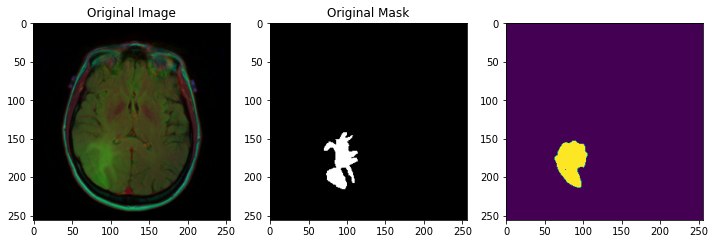

In [2]:
img=cv2.imread('/kaggle/input/mri-images/TCGA_CS_6665_20010817_14.tif')
mask=cv2.imread('/kaggle/input/mri-images/TCGA_CS_6665_20010817_14_mask.tif')
img = cv2.resize(img ,IMAGE_SIZE)
img = img / 255
img = img[np.newaxis, :, :, :]
pred1=model1.predict(img)
x=iou(mask,pred1)
print("IOU percentage: ",x.numpy())

plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(np.squeeze(img))
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(np.squeeze(mask))
plt.title('Original Mask')
plt.subplot(1,3,3)
plt.imshow(np.squeeze(pred1) > .5)

IOU percentage(UNET):  2.4913607
1.4257040737856752


Text(0.5, 1.0, 'Unet Predicted Mask')

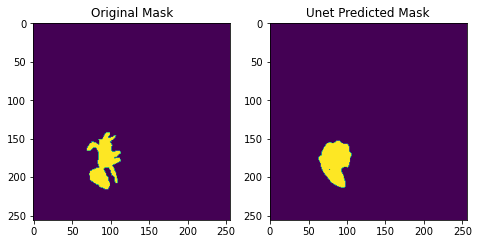

In [3]:
img1=cv2.imread('/kaggle/input/mri-images/TCGA_CS_6665_20010817_14.tif')
mask1=cv2.imread('/kaggle/input/mri-images/TCGA_CS_6665_20010817_14_mask.tif')
img1 = cv2.resize(img1 ,IMAGE_SIZE)
img1 = img1 / 255
img1 = img1[np.newaxis, :, :, :]
pred2=model1.predict(img1)
x=iou(mask1,pred1)
print("IOU percentage(UNET): ",x.numpy())
m1=np.squeeze(mask1)
m1=cv2.cvtColor(m1, cv2.COLOR_BGR2GRAY)
p1=np.squeeze(pred1)>.5
p1=1*p1
y=dice(m1,p1)
print(y)

plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(m1)
plt.title('Original Mask')
plt.subplot(1,3,2)
plt.imshow(p1)
plt.title('Unet Predicted Mask')



IOU percentage:  0.036282863
0.027243126695107648


Text(0.5, 1.0, 'ResUNET Predicted Mask')

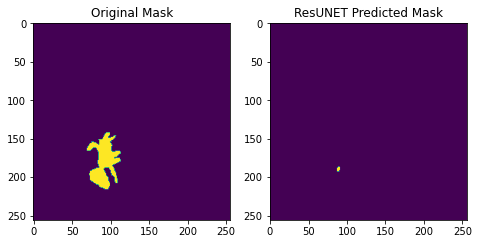

In [4]:
img2=cv2.imread('/kaggle/input/mri-images/TCGA_CS_6665_20010817_14.tif')
mask2=cv2.imread('/kaggle/input/mri-images/TCGA_CS_6665_20010817_14_mask.tif')
img2 = cv2.resize(img2 ,IMAGE_SIZE)
img2 = img2 / 255
img2 = img2[np.newaxis, :, :, :]
pred2=model2.predict(img2)
m2=np.squeeze(mask2)
m2=cv2.cvtColor(m2, cv2.COLOR_BGR2GRAY)
p2=np.squeeze(pred2)>.5
p2=1*p2

x=iou(mask2,pred2)
print("IOU percentage: ",x.numpy())
y=dice(m2,p2)
print(y)

plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(m2)
plt.title('Original Mask')
plt.subplot(1,3,2)
plt.imshow(p2)
plt.title('ResUNET Predicted Mask')
